# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [2]:
iris = pd.read_csv("./static/IRIS.csv")

## Getting know more about dataset

In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Checks if any null value

In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Check if any duplication

In [7]:
#there is duplicated record in this dataset
print(True in iris.duplicated(keep=False).values)

True


In [8]:
# keep=False marks all duplication as True, there are option for marking first or last occurence, but think marking all safer
iris.duplicated(keep=False)
print(f"Number of duplicated records:{iris.duplicated(keep=False).sum()}")

Number of duplicated records:5


In [9]:
print(iris[iris.duplicated(keep="first")])

     sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


In [10]:
print(iris[iris.duplicated(keep="last")])

     sepal_length  sepal_width  petal_length  petal_width         species
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica


In [11]:
print(iris[iris.duplicated(keep=False)])

     sepal_length  sepal_width  petal_length  petal_width         species
9             4.9          3.1           1.5          0.1     Iris-setosa
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
101           5.8          2.7           5.1          1.9  Iris-virginica
142           5.8          2.7           5.1          1.9  Iris-virginica


In [12]:
iris_dropDuplicates = iris.drop_duplicates()
print(True in iris_dropDuplicates.duplicated(keep=False).values)

False


In [13]:
iris_dropDuplicates['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

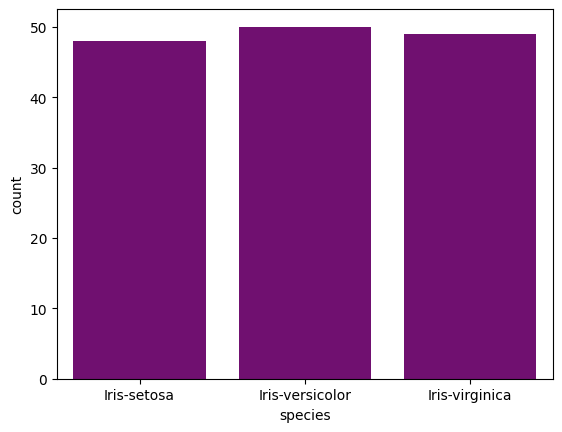

In [14]:
sns.countplot(x='species',data=iris_dropDuplicates,color='purple')

## Insight Gained from scatter plot (Distribution & Pattern)
The Iris-setosa can be easily differentiated from the other two species based on features, but the Versicolor and Virginica overlap at the border. However, Virginia has the longest Petals, Sepal Length, and Petal Width, whereas Sentosa has the widest sepal width.

#### For Sepal Length and Petal Length

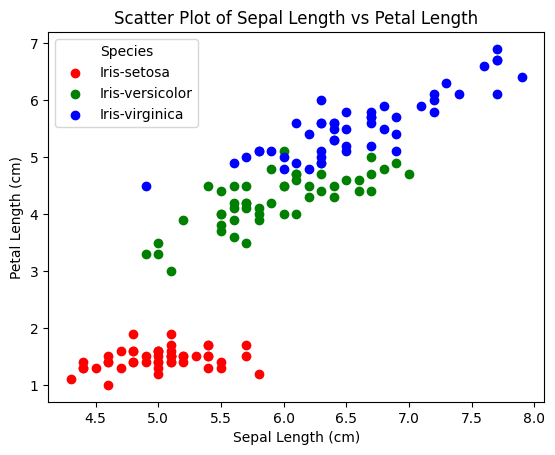

In [15]:
colours = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
for species, color in colours.items():
    subset = iris_dropDuplicates[iris_dropDuplicates['species'] == species]
    plt.scatter(subset["sepal_length"], subset["petal_length"], c=color, label=species)
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()

#### For Sepal Width and Petal Width

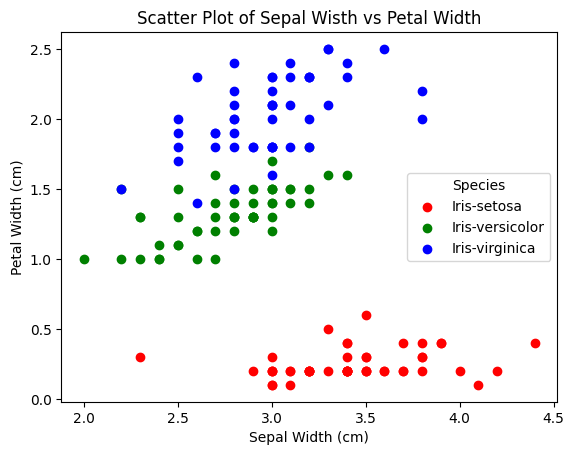

In [16]:
colours = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
for species, color in colours.items():
    subset = iris_dropDuplicates[iris_dropDuplicates['species'] == species]
    plt.scatter(subset["sepal_width"], subset["petal_width"], c=color, label=species)
plt.title("Scatter Plot of Sepal Wisth vs Petal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()

## Insight gained from Boxplot (outliers)
Overall, there is no outlier if seen from the big picture. However, if you zoom into each species, there are a few outliers shown as a hollow circle.

Distribution of the data grouped by species, this allow us to gain understanding about the characteristics of each species: 


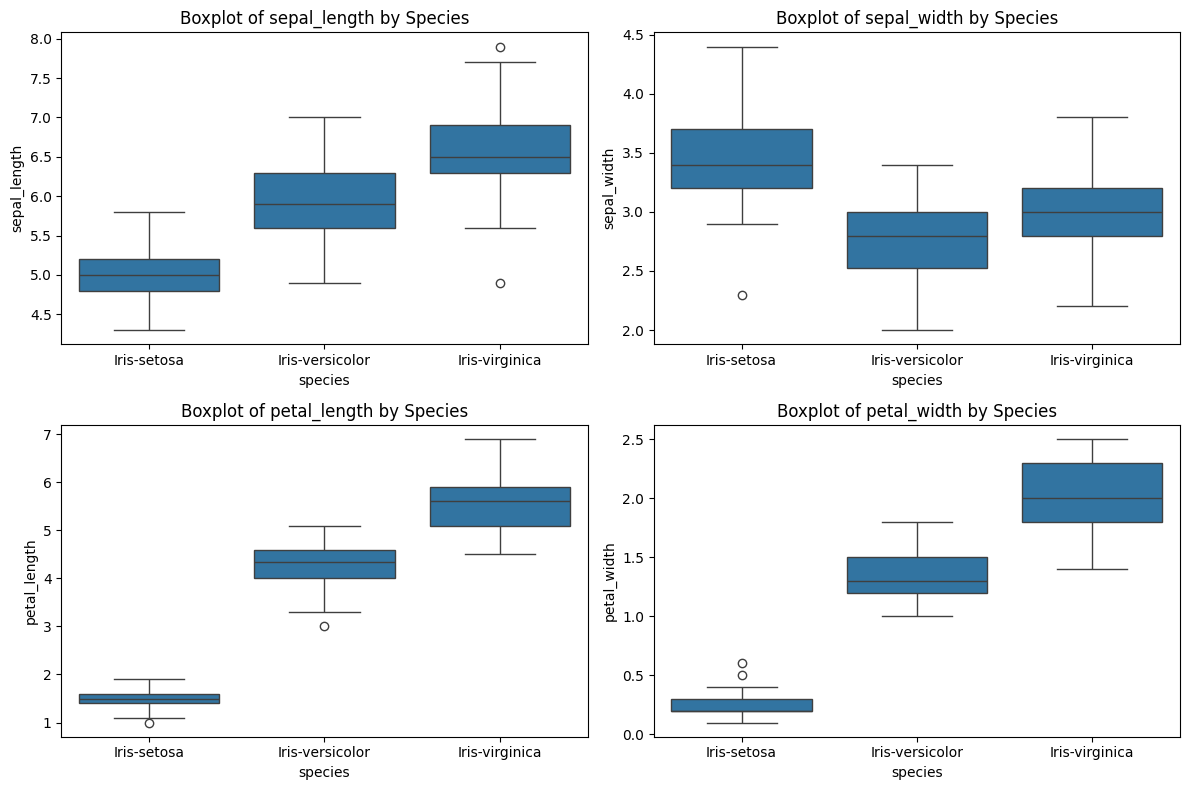

In [17]:
print("Distribution of the data grouped by species, this allow us to gain understanding about the characteristics of each species: ")
plt.figure(figsize=(12,8))
for i,col in enumerate(iris_dropDuplicates.columns[:-1]):
    # species as iterator 
    plt.subplot(2,2,i+1)
    sns.boxplot(x='species',y=col,data=iris_dropDuplicates)
    plt.title(f'Boxplot of {col} by Species')
plt.tight_layout()
plt.show()

## Encoding [species]

In [18]:
encoder = LabelEncoder()
iris_encoding = iris_dropDuplicates.copy()

# save target name before encoding for result analysis later on
target_names = iris_encoding['species'].unique()

# Now encode the species column
iris_encoding['species_encoded'] = encoder.fit_transform(iris_encoding['species'])
iris_encoded = iris_encoding.drop(columns=['species'])
iris_encoded

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Correlation Analysis Process and Insight
the correlation analysis includes species to show the interesting relationship between features and target. Therefore, the process of this (correlation_matrix -> plot heatmap using seaborn). 

Sentosa = 0, Versicolor = 1,Virginica = 2

In the [species_encoded] column, the positive numbers = increasing in numerical value of species (0,1,2); negative numbers = decrease in species code (2,1,0). This also indirectly implies the result we got from the scatter plots.

In [19]:
correlation_matrix = iris_encoded.corr()
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species_encoded,0.782904,-0.418348,0.948339,0.955693,1.000000


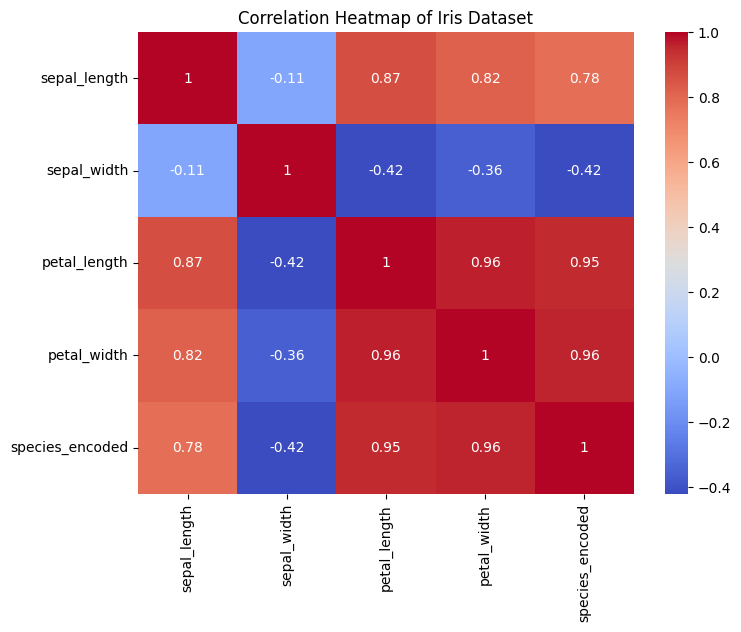

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

## Data Splitting

split before data scaling/normalisation to avoid data leakage 

In [21]:
X = iris_encoded.drop(columns=['species_encoded'])
y = iris_encoded['species_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normalisation / Data Scaling

Does not impact decision tree, but better for KNN and logistic regression

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Summary after EDA

### Amount of records, grouped by species: 
Iris-versicolor(50), Iris-virginica(49), Iris-setosa(48)

### Dataset naming
#### iris: original imported dataset
#### iris_dropDuplicates: original dataset that has no duplicated records
#### iris_encoding: copy of iris_dropDuplicates, apply encoding process on it
#### iris_encoded: iris dataset that has no duplicated records and numerical species value (Sentosa = 0, Versicolor = 1,Virginica = 2)
#### X_train, X_test: the features have not yet be scaled
#### X_train_scaled, X_test_scaled: after scaled

Decision tree can use either scaled or unscaled dataset

## Logistic Regression (LR)

In [23]:
# initializing LR model
lr = LogisticRegression (
    C= 10, 
    max_iter = 100, 
    random_state=42
)

In [24]:
# training the LR model based on the train set
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=10, random_state=42)

In [25]:
# creating predictions of y based on x test
y_pred_lr = lr.predict(X_test_scaled)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy*100:.3f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy of Logistic Regression: 97.778

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     1.0000    0.9167    0.9565        12
           2     0.9412    1.0000    0.9697        16

    accuracy                         0.9778        45
   macro avg     0.9804    0.9722    0.9754        45
weighted avg     0.9791    0.9778    0.9776        45


Confusion Matrix:
[[17  0  0]
 [ 0 11  1]
 [ 0  0 16]]


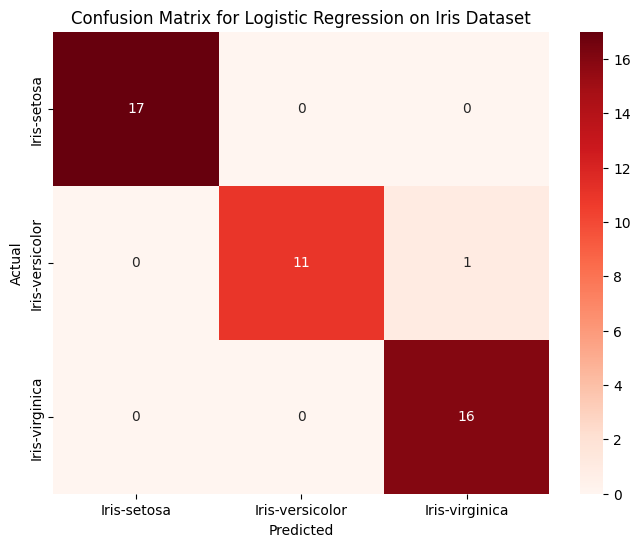

In [27]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression on Iris Dataset')
plt.show()

## Finding Optimal C and Max Iterations

In [28]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500, 1000]
}

# Logistic Regression model
lr_test = LogisticRegression()

# Grid search
grid_search = GridSearchCV(lr_test, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'C': 10, 'max_iter': 100}


## Plotting ROC-AUC Curve

In [29]:
# For multiclass classification, modifications need to be made to ROC-AUC since its usually for binary classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_predict_prob = lr.predict_proba(X_test_scaled)

In [30]:
# Macro-averaged AUC
roc_auc = roc_auc_score(y_test, y_predict_prob, average="macro", multi_class="ovr")
print(f"Macro-Averaged ROC-AUC: {roc_auc*100:.3f}")

Macro-Averaged ROC-AUC: 99.532


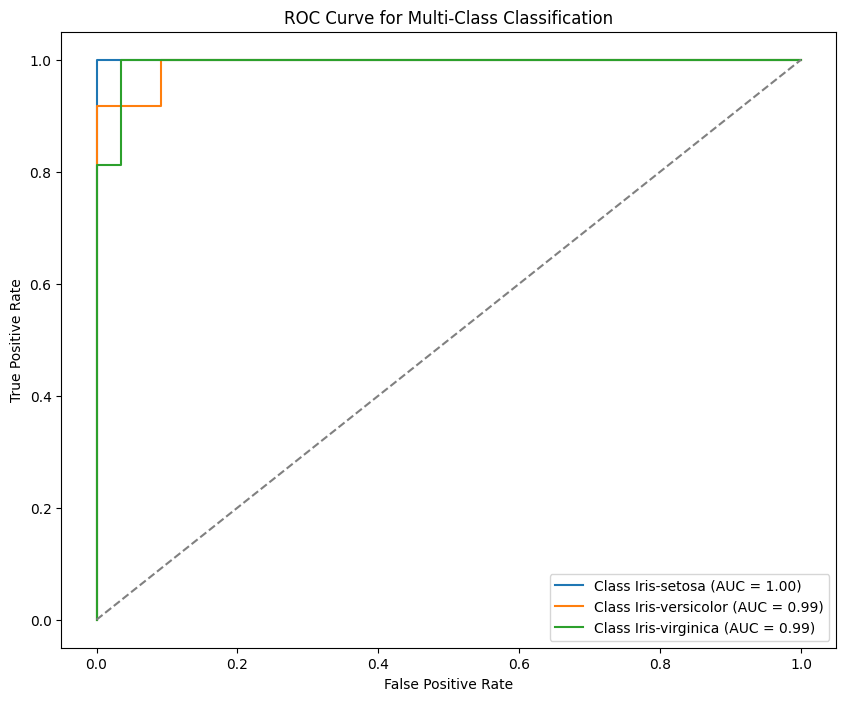

In [31]:
# Prepare ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(target_names)  # Assuming target_names is a list or array of class names

plt.figure(figsize=(10, 8))

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_predict_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {target_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot random chance reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()